In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import rate_model as rm

In [2]:
params_dict_burst = {
    # main params
    'sim_time': 3.,
    'dt': 0.001,
    'sampl_dt': 0.01,
    'N': 90,

    'J0': -1.*2*np.pi,
    'J1': 12.*2*np.pi,
    'J_EI': 1.9,
    'J_IE': 1.8*2*np.pi,
    'eps': 2.,
    'conn_width': 1/2.2,
    'conn_type' : 'trunc_cos',
    'seed': 0,

    'U': 0.3,
    'I0': -0.1,
    'tau_d': 0.3,
    'tau_f': 4.0,
    'tau': 0.01,
    'alpha': 1.5,
}

In [3]:
stim_burst = {
    'stim_start': [.0],
    'stim_duration': [.05],
    'stim_ampl': [390.0],
    'stim_pos': [30.0],
    'stim_width': [1/2.2],
    'stim_type': ['trunc_cos']
}

In [4]:
angles = np.arange(-160.1, 179, 2)
speeds = np.zeros_like(angles)

rate_network = rm.RateNetwork.init_all_params(**params_dict_burst)
for i, st_pos in enumerate(angles):
    stim_burst['stim_pos'] = [st_pos]
    rate_network.set_initial_values()
    rate_network.set_stimuli(**stim_burst)

    rate_network.simulate_facil(backend = 'c')
    
    speeds[i] = rate_network.get_angle(rate_network.ActU[-1]) - rate_network.get_angle(rate_network.ActU[3])
    speeds[i] = np.degrees(speeds[i])
    speeds[i] /= params_dict_burst['sim_time']

1.2611616421616578


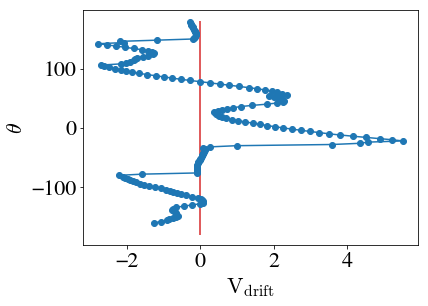

In [5]:
print(np.mean(np.abs(speeds)))
pl.plot(speeds, angles, '-o')
pl.xlabel('$V_{drift}$')
pl.ylabel('$\\theta $')
pl.vlines(0, -180, 180, 'C3');